In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv("Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,California,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94


In [4]:
data.shape

(50, 5)

In [5]:
data['State'] = data['State'].factorize()[0]

In [6]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# Simple Linear Regression

In [7]:
y = data.iloc[:,4]

In [20]:
x = data.iloc[:,3:4]

In [11]:
x

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34
5,131876.90
6,134615.46
7,130298.13
8,120542.52
9,123334.88


In [21]:
x.head()

,State
0,0
1,1
2,1
3,0
4,1


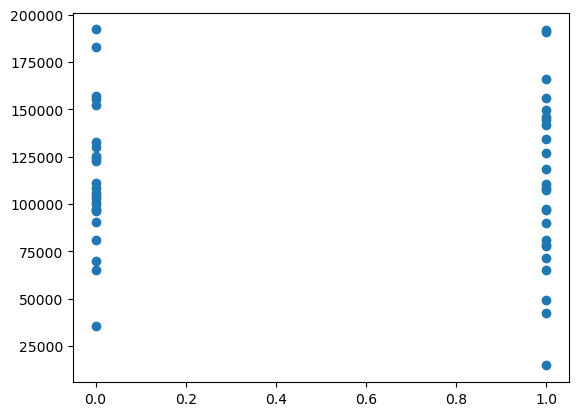

In [22]:
plt.scatter(x,y)

In [23]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [24]:
x1 = sm.add_constant(x)
 

In [25]:
model = sm.OLS(y,x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                   0.08773
Date:                Wed, 06 Sep 2023   Prob (F-statistic):              0.768
Time:                        21:51:52   Log-Likelihood:                -600.61
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.137e+05   8137.342     13.975      0.000    9.74e+04     1.3e+05
State      -3408.5104   1.15e+04     -0.296      0.768   -2.65e+04    1.97e+04
==============================================================================
Omnibus:                        0.033   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.984   Jarque-Bera (JB):                0.106
Skew:                           0.052   Prob(JB):                        0.949
Kurtosis:                       2.801   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Mulitple Linear Regression

In [27]:
x = data[['R&D Spend','Marketing Spend']]

In [28]:
x.head()

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42


In [29]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [30]:
x1 = sm.add_constant(x)
model = sm.OLS(y,x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           2.16e-31
Time:                        21:55:41   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""